## 데이터(2): NASA Prognostics Sensor Data
- 출처: https://www.nasa.gov/content/prognostics-center-of-excellence-data-set-repository
 - NASA prognostics repository
 - Turbofan Engine Degradation Simulation
- PHM(Prognostics and Health Management)

## 센서 데이터 이해 및 처리
- 기존에 다루던 서비스 직군의 데이터와 달리 도메인 지식이 많이 없다고 가정
- 익숙하지 않은 도메인의 생소한 형태의 데이터도 분석할 수 있는 역량 중요
 - Prognostics 분야의 데이터 활용
 - 생소한 분야의 데이터에서 인사이트를 추출하고 문제를 해결하는 방법에 대한 이해

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('test2.csv')
df.shape

(20631, 26)

In [3]:
df.head().T

# 센서 데이터 -> 익명 처리된 데이터가 아님에도 도메인 지식 없이는 컬럼의 의미 파악 불가
# 해석이 난감한 생소한 형태의 데이터를 분석할 수 있는 방법에 대한 고민

# 추후에 직원 상세 정보 등 익명 처리/암호화된 데이터를 접할 경우,
# 일반적으로 수치는 공개하지만 무슨 값인지(컬럼명)는 공개 x
# 따라서 생소한 도메인의 데이터, 익명 처리된 데이터 분석 역량 필요

,0,1,2,3,4
unit,1.0000,1.0000,1.0000,1.0000,1.0000
cycle,1.0000,2.0000,3.0000,4.0000,5.0000
op_1,-0.0007,0.0019,-0.0043,0.0007,-0.0019
op_2,-0.0004,-0.0003,0.0003,0.0000,-0.0002
op_3,100.0000,100.0000,100.0000,100.0000,100.0000
T2,518.6700,518.6700,518.6700,518.6700,518.6700
T24,641.8200,642.1500,642.3500,642.3500,642.3700
T30,1589.7000,1591.8200,1587.9900,1582.7900,1582.8500
T50,1400.6000,1403.1400,1404.2000,1401.8700,1406.2200
P2,14.6200,14.6200,14.6200,14.6200,14.6200


## Business Understanding
- 해당 산업의 목적과 관심사에 대한 파악 필요
    - 1차 산업: 원자재, 자연과 직접적으로 연관된 활동
     - ex) 자연으로부터 얻은 광물, 축산업, 농업, 임업, 수산업
    - 2차 산업: 1차 산업군에서 얻은 원자재를 가공하여 공산품/재화/에너지(인간에게 필요한 형태)로 만드는 산업
     - ex) 건설업, 전력/가스업, 수도업, 제조업, 수리/보수업
    - 3차 산업: 1, 2차 산업에서 생산된 원자재, 공산품을 이동시키는 산업
     - ex) 유통업, 도소매업, 보건업, 서비스업 등등
- Prognostics: 2차 산업군 관련 데이터

#### 2차 산업군 데이터의 중요성
- 우리나라 GDP의 절반 이상은 2차 산업군에서 발생
 - 네이버 등 서비스 직군 IT 기업의 부상과 별개로 국내 대기업은 대부분 2차 산업 관련
 - 국내용 게임/IT 서비스 회사가 아닌 삼성, LG, 현대 등 글로벌 시장에서 성공한 대다수의 국내 그룹사는 2차 산업군
- 공개적으로 얻을 수 있는 대부분의 데이터셋은 3차 산업군(B2C)
 - 2차 산업군의 경쟁력 확보에도 인공지능과 빅데이터가 중요하게 작용
 - 익숙하지 않은 2차 산업군 관련 데이터에 대한 학습 필요

#### Smart Factory
- 생산 과정에 자동화 솔루션이 결합된, ICT 정보통신기술을 적용하여 생산성이나 품질을 극대화하는 지능형 생산 공장
 - 2차 산업의 관심사
- 인공지능을 활용한 Smart Factory의 핵심
 - VM
 - APC
 - PHM

## VM(Virtual Metrology, 가상 계측)
- 공정 과정에서 실제로 측정하는 대신 가상으로 측정(soft-sensor)
 - 공정: 재료가 설비에 들어갔다가 나오기까지의 과정
- ex) 큰 톱으로 거대한 쇳덩이를 1미터 간격으로 자르는 공정
 - 자르는 횟수가 많아질수록 톱날이 닳아 조금씩 오차가 발생
 - 따라서 공정이 잘 되는지(1미터 간격으로 균일하게 잘리는지) 지속적인 계측 필요
 - VM: 공정 상의 계측을 가상으로 수행
- 가상 계측 방법
 - 적당한 온도에서의 톱날의 상태, 톱날의 회전수 등 + 장비 상태, 모터 상태, 레일 상태
 - 위의 센서 데이터들을 feature로, 1미터 절단 공정 결과를 레이블로 설정
 - feature 값에 따른 결과를 한 제품 당 하나의 행으로 데이터화하여 머신러닝 모델 생성에 활용
 - 각 센서 데이터가 이러했을 때 정상이었다면 새로운 센서 값이 이러할 때의 공정 결과는 어떨지 예측
 - 절단 후 불량여부를 확인하는 정상적인 프로세스와 달리 절단 시 feature 값을 기반으로 결과를 판단

#### VM의 목적 및 효과
- 계측에 소요되는 시간을 줄여 생산성 증가
- 가상 계측을 활용하여 직접 계측 대상을 줄이면 생산의 소요시간 감소
 - 정석대로 전수검사를 하지 않고 통계적으로 대표성 있게 일부분을 추출(sampling)
 - 계측에 걸리는 시간 또한 생산성 하락에 영향
 - 실제로 계측하는 대신 머신러닝으로 계측값을 도출하여 계측 설비에 들어가는 시간과 비용 감소
 - 공정 설비에서 나오는 센서 데이터만을 가지고도 계측값 예측 가능
- VM: 2차 산업군에서 생산성 향상을 위해 필수

## APC(Automatic Process Control, 자동 공정 관리)
- 최종 결과물을 기반으로 공정 설비에 설정된 값을 보정
- 같은 시간과 양(제품 자재 등)을 사용하면서 불량률을 줄여 생산성 향상

## PHM(Prognostics and Health Management, 건전성 예측 및 관리)
- Prognostics(검진, 예후): 증상이 발현되기 전에 확인
- Diagnostics(진단): 증상이 발현되었을 때 확인
 - 일반적으로 엔지니어들의 업무
 - 기계 오작동 시 문제를 확인하고 부품을 교체하는 등의 업무
- PHM: 설비 예방보전
 - Health Management: 기계의 건강 관리(기계가 최상의 컨디션을 유지할 수 있도록)
 - 기계의 health management 및 기계의 고장에 미리 대응하기 위한 검진

#### 설비 고장 해결 프로세스
1. 현장 엔지니어 고장 인지
2. 담당 엔지니어 호출
3. 담당 엔지니어 입실(해당 설비에 진입)
4. Diagnostics
5. Trouble shooting(문제를 잡는 과정)
    1. 국내에 재고가 있는 경우
    2. 국내에 재고가 없는 경우
     - 고장이 지속되면 당장 생산이 불가능하므로 사후처리는 비효율적
     - 설비가 다운되기 전에 예방할 수 있는 PHM 중요

#### PHM의 목적 및 효과
- 설비 고장의 시점과 원인에 대한 예측
 - 설비 고장 해결 절차의 상당 부분 해소
 - 문제 해결에 소요되는 시간 감소
- 설비 고장을 예방함으로써 공정의 생산성 향상

In [4]:
df.head().T

##### 컬럼에 대한 간단한 설명 #####

# unit: 엔진 번호(여러 개의 엔진을 구분)
# cycle: 해당 unit을 몇 번째 사용했을 때의 측정값인지

# op_1, 2, 3: 엔진 모드(큰 의미 부여 x)

# T: 비행기 날개에 달린 터보 엔진(turbo fan) 센서 데이터
# T2: 엔진으로 들어가는 공기의 온도
# ... (이후 컬럼들 모두 특정 센서에서 측정한 수치)


##### 생소한 데이터의 분석 #####

# 컬럼(feature)의 의미를 모르는 상태에서의 분석 -> 컬럼 간의 관계 분석에 초점

# 변수들의 상관관계를 분석하여 레이블 성향의 컬럼에 어떤 영향을 미치는지 확인
# ex) 특정 컬럼의 값이 증가하면 다른 컬럼의 값이 감소하는 경향

,0,1,2,3,4
unit,1.0000,1.0000,1.0000,1.0000,1.0000
cycle,1.0000,2.0000,3.0000,4.0000,5.0000
op_1,-0.0007,0.0019,-0.0043,0.0007,-0.0019
op_2,-0.0004,-0.0003,0.0003,0.0000,-0.0002
op_3,100.0000,100.0000,100.0000,100.0000,100.0000
T2,518.6700,518.6700,518.6700,518.6700,518.6700
T24,641.8200,642.1500,642.3500,642.3500,642.3700
T30,1589.7000,1591.8200,1587.9900,1582.7900,1582.8500
T50,1400.6000,1403.1400,1404.2000,1401.8700,1406.2200
P2,14.6200,14.6200,14.6200,14.6200,14.6200


## Data Understanding
- 컬럼의 목록을 모른다는 가정 하에 진행
 - 데이터에 대한 기계적인 분석을 수행해주는 도구(pandas_profiling) 사용
 - Data Understanding 단계를 수월하게 진행

In [5]:
import pandas_profiling as pp

In [6]:
report = pp.ProfileReport(df)
report.to_file('test2_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Missing cells, Duplicate rows 없는 아주 깔끔한 데이터

# Variables
# unit: 100개의 엔진 존재
# cycle: 값이 커질수록 엔진 고장에 근접 + 각각의 unit에 대하여 사용 횟수가 상이

# distinct 값이 1인 컬럼은 pandas_profiling 자체적으로 삭제 -> 표준편차가 0이므로 의미가 없다고 판단
# 무의미하여 reject된 컬럼이 꽤 존재하는 것이 센서 데이터의 특징


##### 센서 데이터의 특징 #####

# 무의미한 컬럼이 존재할 가능성 다분
# 센서는 서로 유효한 종류를 함께 사용해야 유의미

# 급변하는 데이터 수집 환경으로 인해 위치와 종류가 명확한 센서가 드물기 때문에,
# 조합이 맞지 않아 무의미한 센서 데이터가 존재

## Data Exploration
- 분석 방향성: 설비 예방보전(PHM)
 - 설비 고장까지 남은 시간
 - 데이터셋에 고장 정보가 없으므로 분석 방향성에 맞는 레이블 생성 필요
- 고장 정보(label) 생성
 - 엔진 번호, 엔진 사용횟수, 센서 정보 보유
 - cycle 컬럼 활용: 엔진 사용횟수가 더이상 늘어나지 않고 다음 unit으로 이동했다면 기계 고장이라고 판단
 - 따라서 cycle 값을 시각화하여 추세를 확인

In [8]:
df.columns

# 센서 데이터의 의미를 알지 못하므로 일단 cycle 기준으로 하나하나 그려보며 시작

Index(['unit', 'cycle', 'op_1', 'op_2', 'op_3', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')

<AxesSubplot:xlabel='cycle', ylabel='T2'>

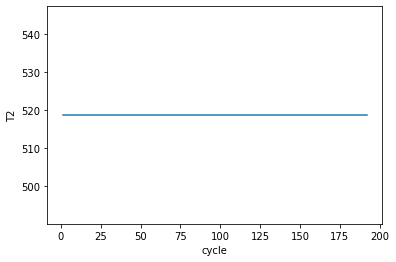

In [12]:
# 사용횟수가 증가함에 따라 T2가 바뀌는지 확인
# 1번 unit의 경우 먼저 확인
unit = df.loc[df['unit'] == 1]
sns.lineplot(data=unit, x='cycle', y='T2')

# T2는 사용횟수와 연관이 없는 데이터(변수의 의미를 모른다는 가정 하의 분석)
# T2: 온도 -> 센서 데이터 수집 시의 외부환경이므로 엔진 사용횟수와 무관

<AxesSubplot:xlabel='cycle', ylabel='P30'>

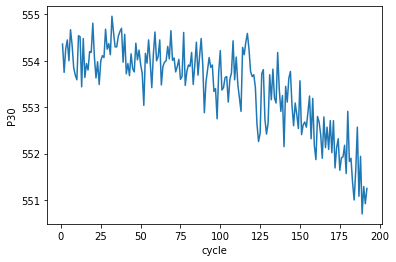

In [13]:
# P로 시작하는 센서 확인(P30)
sns.lineplot(data=unit, x='cycle', y='P30')

# 사용횟수가 늘어남에 따라(cycle 증가) P30 감소 경향
# 단, 선형 관계(직선 형태) x
# 처음에는 기울기에 큰 변화가 없다가 갑작스럽게 떨어지는 구간 존재
# 엔진이 정상 작동하다가 P30 센서 수치가 어느 순간 뚝 떨어지면서 고장이 난다고 해석 가능
# P30 값이 크고 작을 때의 기울기의 편차가 큼

<AxesSubplot:xlabel='cycle', ylabel='P30'>

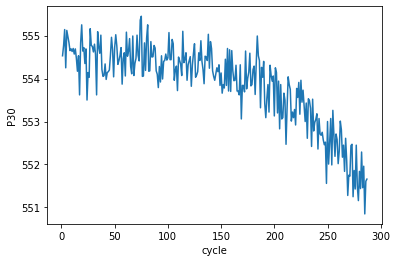

In [14]:
# 다른 unit 대상으로 사용횟수에 따른 P30의 변화 확인
unit = df.loc[df['unit'] == 2]
sns.lineplot(data=unit, x='cycle', y='P30')

# 1번 unit은 200회 좀 안되어서, 2번 unit은 300회 좀 안되어서 고장 -> 시작점에 차이가 존재
# 어떤 엔진은 새걸로 시작, 어떤 엔진은 낡은 걸로 시작

# cycle 수는 다르지만 P30의 값이 551 근처 정도로 갔을 때 수명이 거의 다한다는 공통점 도출

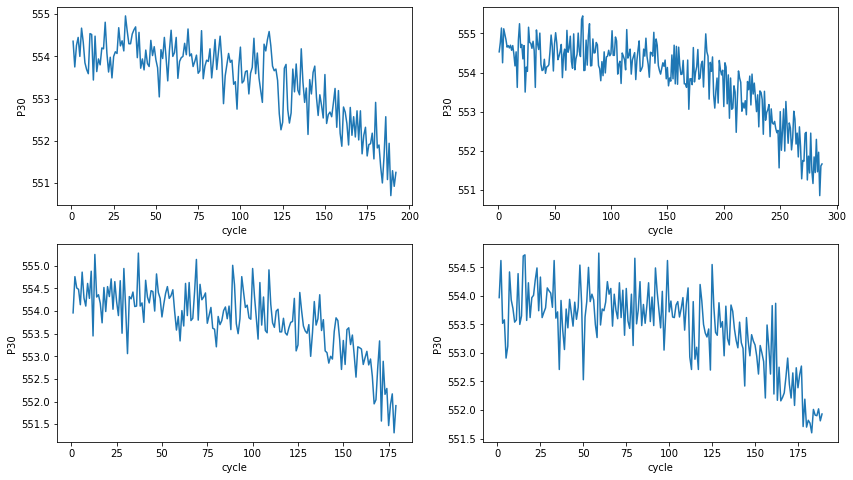

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i in range(4):
    unit = df.loc[df['unit'] == i+1]
    sns.lineplot(data=unit, x='cycle', y='P30', ax=axes[i])

# plt.subplots_adjust(wspace=0.2, hspace=0.2)

# 어떤 엔진이든 고장에 가까워질수록 P30 값이 내려가는(551 정도의 수준) 경향

In [16]:
# 그렇다면 cycle을 레이블로 활용해도 괜찮을까?
# 엔진의 시작점이 달라 cycle 횟수가 천차만별이므로 안된다고 판단

#### 엔진 사용횟수(cycle)를 레이블로 사용한다면?
- 알고리즘은 센서들이 특정 값이 되었을 때 엔진을 몇 회 정도 사용했을지에 대한 학습을 수행
 - 이러한 학습은 unit의 상태가 모두 동등할 때 의미가 있지만, 지금은 모든 unit의 상태가 제각각
- ex) 모든 unit이 190회 정도 사용되었다면 1번 unit은 고장까지 두 번, 2번 unit은 약 100번 남은 것
- cycle 레이블 사용 시 센서 데이터와 고장까지 남은 사용횟수의 관계를 나타낼 수 없으므로 분석 방향성에 맞는 새로운 레이블 필요

In [17]:
df.groupby('unit').agg({'cycle':np.max})

# max cycle, 즉 고장 직전의 사용횟수가 unit별로 모두 상이

,cycle
unit,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


### RUL(Remaining Useful Life)
- 잔존 유효 수명(RUL) 변수 추가
 - unit마다 max cycle이 다른 것을 반영
 - 서로 다른 엔진의 cycle 값이 같더라도 잔존 수명이 같지 x
 - RUL 값이 같을 때 잔존 수명이 같도록 설정
 - cycle 값이 커질수록 값이 작아져 max cycle에 0이 되는 RUL 컬럼을 생성
- 분석 방향성에 맞는 레이블 역할의 새로운 컬럼

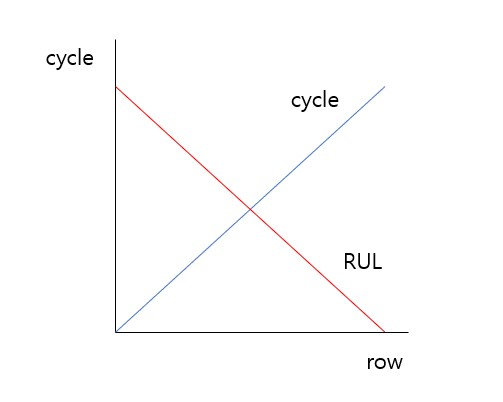

In [18]:
unit_no = 3
unit = df.loc[df['unit'] == unit_no]
unit.tail()

# 3번 unit은 179회까지 사용 가능하고, 180번 째에서 고장
# cycle은 행 번호가 1만큼 커질 때마다 1만큼씩 증가
# 반대로 RUL 값은 행 번호가 증가함에 따라 감소
# 최종 RUL을 1로 설정 -> 한 번 더 사용하면 고장

,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
653,3,175,-0.0030,0.0004,100.0,518.67,643.15,1603.74,1424.17,14.62,...,520.34,2388.14,8238.86,8.5066,0.03,396,2388,100.0,38.49,22.9909
654,3,176,-0.0008,0.0002,100.0,518.67,643.93,1595.61,1438.51,14.62,...,520.91,2388.12,8251.82,8.5245,0.03,396,2388,100.0,38.49,23.0656
655,3,177,-0.0041,-0.0002,100.0,518.67,643.68,1601.21,1423.50,14.62,...,520.19,2388.16,8249.86,8.5286,0.03,397,2388,100.0,38.37,23.0336
656,3,178,-0.0010,0.0001,100.0,518.67,643.66,1606.50,1430.55,14.62,...,520.14,2388.12,8253.84,8.5351,0.03,399,2388,100.0,38.57,23.1323
657,3,179,0.0012,0.0000,100.0,518.67,643.51,1604.80,1428.23,14.62,...,519.53,2388.20,8255.34,8.5056,0.03,398,2388,100.0,38.40,22.9562


#### RUL 변수 생성
- max cycle - cycle + 1

In [19]:
import warnings
warnings.simplefilter(action='ignore')

In [20]:
cy_max = np.max(unit['cycle'])
cy_max - unit['cycle'] + 1

479    179
480    178
481    177
482    176
483    175
      ... 
653      5
654      4
655      3
656      2
657      1
Name: cycle, Length: 179, dtype: int64

In [21]:
rul_df = pd.DataFrame()

for i in range(100): # 엔진 unit 개수만큼 반복 수행
    unit = df.loc[df['unit'] == i+1]
    cy_max = np.max(unit['cycle'])
    unit['RUL'] = cy_max - unit['cycle'] + 1
    rul_df = pd.concat([rul_df, unit])

In [22]:
rul_df[['cycle', 'RUL']]

,cycle,RUL
0,1,192
1,2,191
2,3,190
3,4,189
4,5,188
...,...,...
20626,196,5
20627,197,4
20628,198,3
20629,199,2


#### 시각화
- 잔존 수명(RUL)과 센서 데이터의 상관관계 확인

<AxesSubplot:xlabel='RUL', ylabel='P30'>

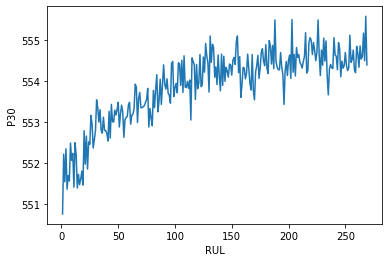

In [23]:
unit = rul_df.loc[df['unit'] == 5]
sns.lineplot(data=unit, x='RUL', y='P30')

# RUL 값이 점점 줄어들면서 고장에 근접
# 고장에 가까워질수록 P30 값이 줄어든다는 논리 적용 가능
# RUL, P30 값이 모두 0에 가까워지면서 고장 -> 고장은 원점(0, 0)

<AxesSubplot:xlabel='RUL', ylabel='P30'>

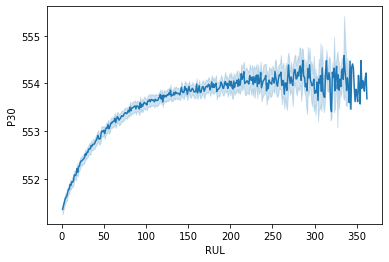

In [24]:
# 모든 unit에 대한 그래프
sns.lineplot(data=rul_df, x='RUL', y='P30')

<AxesSubplot:xlabel='RUL', ylabel='T2'>

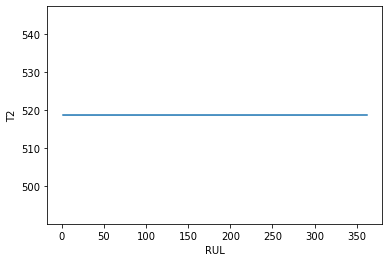

In [25]:
sns.lineplot(data=rul_df, x='RUL', y='T2')

In [26]:
rul_df.columns

Index(['unit', 'cycle', 'op_1', 'op_2', 'op_3', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32', 'RUL'],
      dtype='object')

In [27]:
# 체크 포인트: RUL(레이블)이 추가된 데이터
rul_df.to_csv('test2_modified_1.csv', index=False)

## Data Preparation
- 모델링을 위한 데이터 준비
- RandomForestRegressor
- label은 RUL, feature는 센서 데이터

In [30]:
from sklearn.ensemble import RandomForestRegressor as rf

In [31]:
df = pd.read_csv('test2_modified_1.csv')
df.columns

Index(['unit', 'cycle', 'op_1', 'op_2', 'op_3', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32', 'RUL'],
      dtype='object')

In [32]:
label = 'RUL'
features = ['T2', 'T24', 'T30', 'T50',
           'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr',
           'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB',
           'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']

# RandomForestRegressor 모델 생성
model = rf(n_jobs=-1)
model.fit(df[features], df[label])

RandomForestRegressor(n_jobs=-1)

### Feature Selection
- Random Forest embed 방식
 - 모델 내장 변수 중요도를 기준으로 분석에 사용할 변수 추출
- Filter 방식
 - 기초 통계량을 이용한 기준점을 잡아 기계적으로 변수 제거

#### Random Forest
- RandomForest 모델의 변수 중요도(feature_importances_)

In [33]:
importance = pd.DataFrame()
importance['imp'] = model.feature_importances_
importance['features'] = features
imp_sorted = importance.sort_values(by='imp', ascending=False)
imp_sorted

# 중요도가 0인 컬럼은 학습을 진행할 때 전혀 관여하지 않은 변수
# 상위 컬럼이 고장에 어떤 영향을 미치는지 파악(고장에 가까워질 때의 수치 변화 양상)

,imp,features
10,0.434790,Ps30
8,0.127225,Nc
3,0.097334,T50
11,0.047610,phi
6,0.040380,P30
13,0.039925,NRc
14,0.036285,BPR
20,0.034468,W32
2,0.031167,T30
1,0.029348,T24


<AxesSubplot:xlabel='RUL', ylabel='Ps30'>

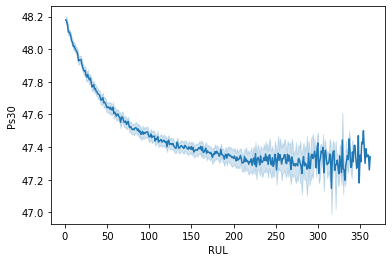

In [34]:
sns.lineplot(data=df, x='RUL', y='Ps30')

# 고장에 가까워질수록 Ps30의 값이 증가

<AxesSubplot:xlabel='RUL', ylabel='Nc'>

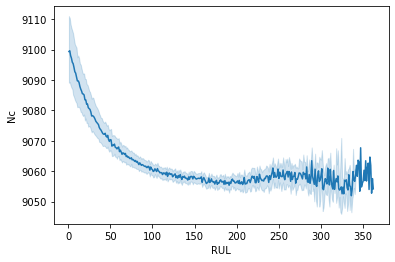

In [35]:
sns.lineplot(data=df, x='RUL', y='Nc')

# 고장에 가까워질수록 Nc의 값이 증가

# Ps30, Nc는 고장에 가까워질수록 값이 증가
# 고장에 가까워질수록 달라지는 센서의 변화를 통해 잔존 수명 파악 가능

# 지금까지 각 컬럼이 어떤 역할을 하는 센서인지 고려하지 않았지만 충분히 분석이 가능

In [36]:
top_8 = list(imp_sorted[:8]['features'])
bottom_8 = list(imp_sorted[-8:]['features'])

In [37]:
top_8 # 상위 8개 컬럼

['Ps30', 'Nc', 'T50', 'phi', 'P30', 'NRc', 'BPR', 'W32']

In [38]:
bottom_8 # 하위 8개 컬럼

['htBleed', 'P15', 'epr', 'P2', 'farB', 'Nf_dmd', 'PCNfR_dmd', 'T2']

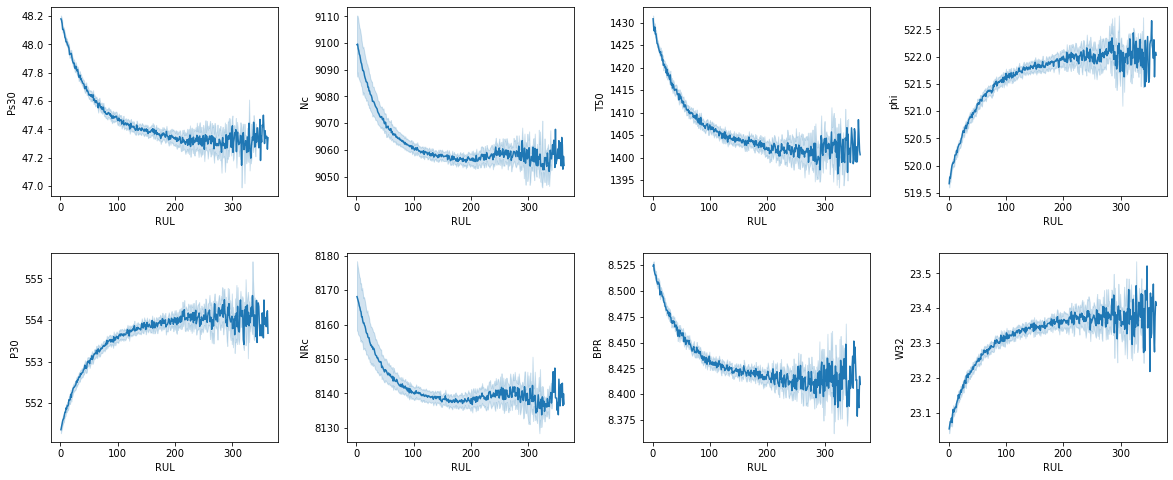

In [39]:
# 중요도 상위 8개 조회
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(top_8):
    sns.lineplot(data=df, x='RUL', y=col, ax=axes[i])

plt.subplots_adjust(wspace=0.3, hspace=0.3)

# 고장에 따른 값의 변화가 뚜렷한 상위 컬럼

In [40]:
# fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4)
# fig.set_size_inches(16, 8)

# sns.lineplot(data=df, x='RUL', y='Ps30', ax=ax1)
# sns.lineplot(data=df, x='RUL', y='Nc', ax=ax2)
# sns.lineplot(data=df, x='RUL', y='T50', ax=ax3)
# sns.lineplot(data=df, x='RUL', y='phi', ax=ax4)
# sns.lineplot(data=df, x='RUL', y='NRc', ax=ax5)
# sns.lineplot(data=df, x='RUL', y='P30', ax=ax6)
# sns.lineplot(data=df, x='RUL', y='BPR', ax=ax7)
# sns.lineplot(data=df, x='RUL', y='W32', ax=ax8)

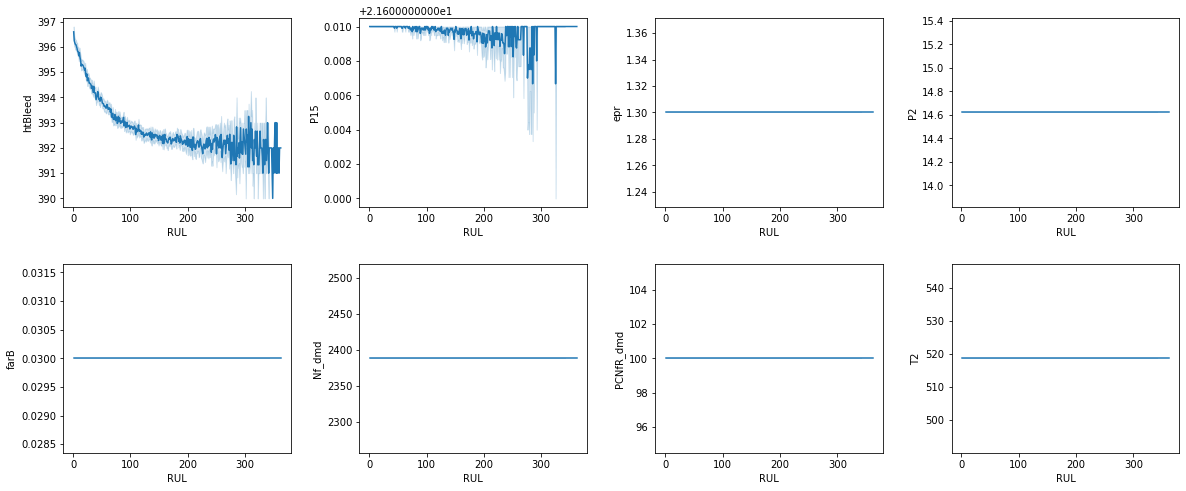

In [43]:
# 중요도 하위 8개 조회
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(bottom_8):
    sns.lineplot(data=df, x='RUL', y=col, ax=axes[i])

plt.subplots_adjust(wspace=0.3, hspace=0.3)

# htBleed는 고장에 가까워질수록 값이 커지는 경향을 보이지만 상위 컬럼에 비해 값의 변화가 미비
# P15는 더더욱 미비하고, 나머지는 상관관계를 전혀 나타내지 않는 것을 확인 가능

#### Random Forest embed 방식 제거 대상
- 경향성을 보이지 않는 변수
 - epr, P2, farB, Nf_dmd, PCNfR_dmd, T2
- 중요도가 낮은 변수
 - P15

#### 기초 통계량
- 표준편차를 활용한 filtering
 - 특정 컬럼의 표준편차가 낮다면 해당 컬럼의 데이터가 모두 큰 차이 없이 유사하다고 해석 가능
 - 이러한 해석은 특히 센서 데이터의 경우에 유효하게 작용

In [44]:
df = pd.read_csv('test2_modified_1.csv')

In [45]:
df.describe()

,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,108.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,1.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,52.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,104.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,156.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,362.000000


In [46]:
# 표준편차가 0.01보다 작은 변수만 조회
desc = df.describe().T
desc.loc[desc['std'] < 0.01]

# 표준편차가 낮음 -> 정보량이 거의 없다는 것이므로 제외
# 표준편차가 0 -> 모든 행의 값이 동일

# * 주의)
# 진공센서의 경우 값이 0에 가까울수록 아주 큰 의미를 가지므로,
# 기초 통계량 기반의 기계적인 변수 제거는 데이터에 대한 이해를 요구

,count,mean,std,min,25%,50%,75%,max
op_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.00,0.0015,0.0087
op_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.00,0.0003,0.0006
op_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.00,100.0000,100.0000
T2,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.67,518.6700,518.6700
P2,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.62,14.6200,14.6200
P15,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.61,21.6100,21.6100
epr,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.30,1.3000,1.3000
farB,20631.0,0.030000,1.556432e-14,0.0300,0.0300,0.03,0.0300,0.0300
Nf_dmd,20631.0,2388.000000,0.000000e+00,2388.0000,2388.0000,2388.00,2388.0000,2388.0000
PCNfR_dmd,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.00,100.0000,100.0000


In [47]:
# 표준편차가 0.01 이상 -> 분석의 의미가 있는 컬럼
desc.loc[desc['std'] >= 0.01].T.columns

Index(['unit', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi',
       'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL'],
      dtype='object')

In [48]:
# 체크 포인트: 표준편차를 기준으로 필터링한 데이터
selected = ['unit', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
            'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL']
df[selected].to_csv('test2_modified_2.csv', index=False)